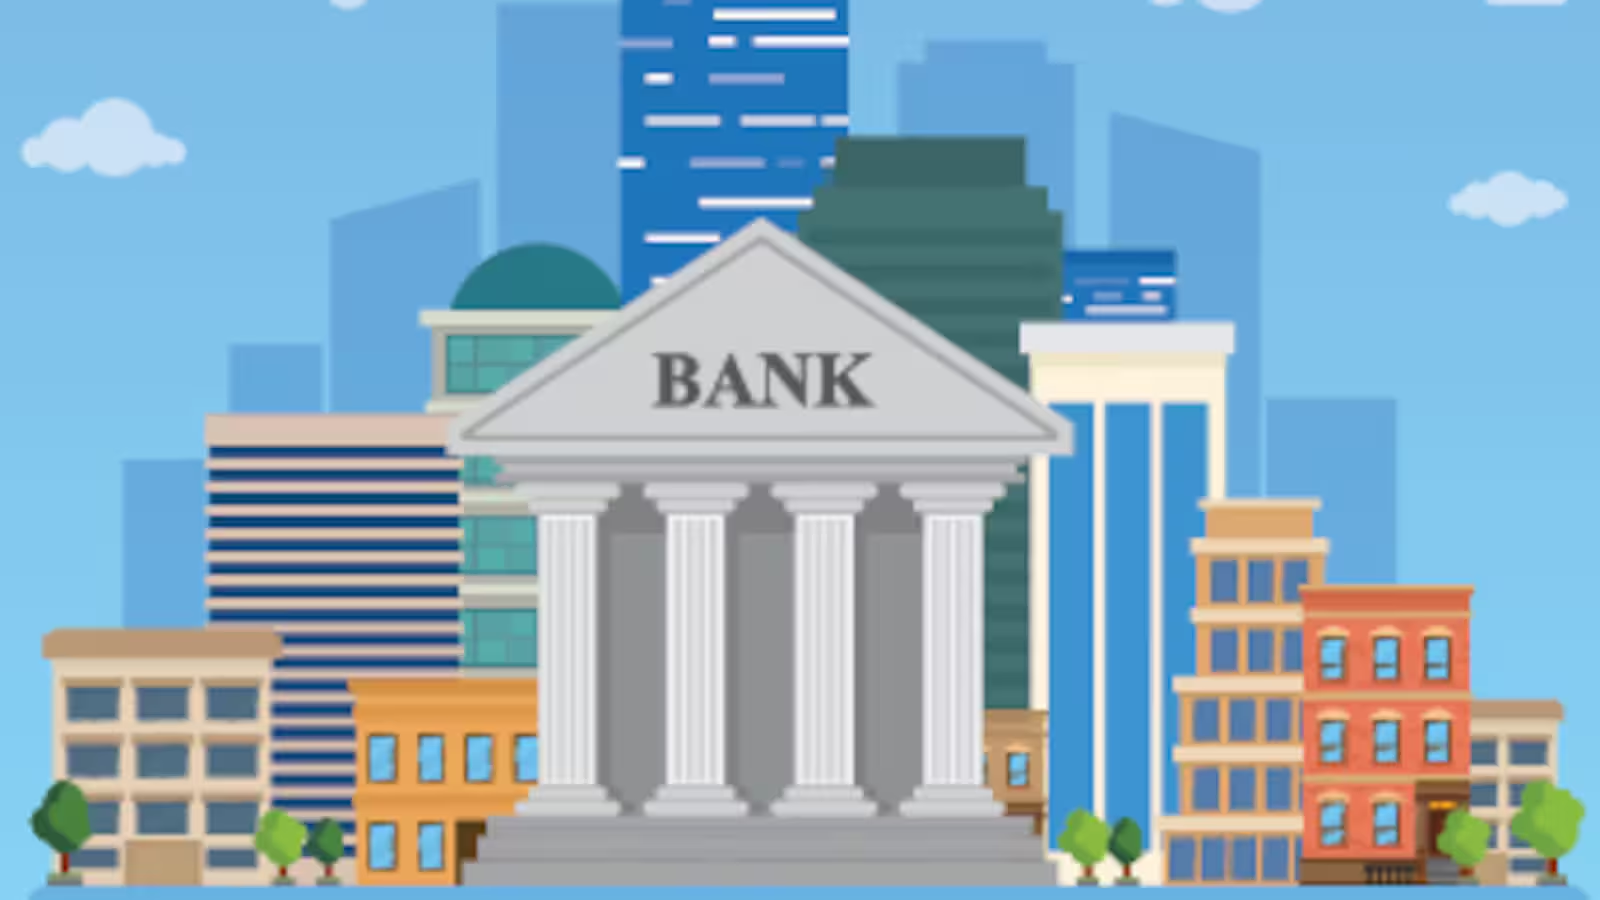
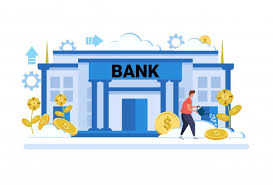

In [1]:
# Import Data Manipulation Libraries
import numpy as np 
import pandas as pd 

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging Files
import logging
logging.basicConfig(level= logging.INFO,
                    filemode= 'w',
                    filename= 'model.log',
                    format= '%(asctime)s - %(name)s-%(levelname)s-%(message)s',force = True)

# Import Stats Scipy Library
import scipy.stats as stats

In [2]:
# Data Import Using Pandas Fucntion 

url = 'https://raw.githubusercontent.com/chandanc5525/BankMarketing_MLModel/refs/heads/main/BankTelemarketing.csv'

df = pd.read_csv(url,sep = ';')

df.sample(frac = 1)  # Shuffle Dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24414,46,management,divorced,secondary,no,10,yes,no,cellular,17,nov,273,1,-1,0,unknown,no
2989,40,blue-collar,married,primary,no,3658,yes,no,unknown,14,may,977,1,-1,0,unknown,no
3850,40,blue-collar,married,secondary,no,2073,yes,no,unknown,16,may,166,2,-1,0,unknown,no
5441,35,admin.,divorced,secondary,no,30,no,no,unknown,23,may,186,1,-1,0,unknown,no
23517,54,services,married,tertiary,no,0,no,no,cellular,28,aug,282,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32326,31,admin.,single,secondary,no,68,yes,no,cellular,16,apr,570,2,-1,0,unknown,no
12781,26,services,married,secondary,no,-236,yes,yes,cellular,7,jul,459,1,-1,0,unknown,no
33119,34,admin.,married,secondary,no,-314,yes,yes,cellular,20,apr,374,3,307,3,other,no
19431,32,technician,married,tertiary,no,500,no,no,cellular,6,aug,105,6,-1,0,unknown,no


In [3]:
# Checking Data Shape and Data Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
logging.info('Dataset Uploaded Successfully.')

In [5]:
# Split the Dataset into Numerical_Data and Categorical_Data

Numerical_Data = df.select_dtypes(exclude = 'object')


Categorical_Data = df.select_dtypes(include = 'object')

In [6]:
# Checking Numerical_Data
Numerical_Data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [7]:
# Checking Categorical_Data
Categorical_Data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [8]:
# Checking Descriptive Stats : Numerical_Data and Categorical_Data
# Univariate Analysis --> EDA 

from collections import OrderedDict

stats = []

for i in Numerical_Data:

    numerical_stats = OrderedDict({
        'Feature': i,
        'Maximum': Numerical_Data[i].max(),
        'Minimum': Numerical_Data[i].min(),
        'Mean': Numerical_Data[i].mean(),
        '25%': Numerical_Data[i].quantile(0.25),
        'Median': Numerical_Data[i].quantile(0.50),
        '75%': Numerical_Data[i].quantile(0.75),
        'Kurtosis': Numerical_Data[i].kurt(),
        'Skewness': Numerical_Data[i].skew(),
        'Standard Deviation': Numerical_Data[i].std()
    })

    stats.append(numerical_stats)

    report = pd.DataFrame(stats)


report



,Feature,Maximum,Minimum,Mean,25%,Median,75%,Kurtosis,Skewness,Standard Deviation
0,age,95,18,40.936210,33.0,39.0,48.0,0.319570,0.684818,10.618762
1,balance,102127,-8019,1362.272058,72.0,448.0,1428.0,140.751547,8.360308,3044.765829
2,day,31,1,15.806419,8.0,16.0,21.0,-1.059897,0.093079,8.322476
3,duration,4918,0,258.163080,103.0,180.0,319.0,18.153915,3.144318,257.527812
4,campaign,63,1,2.763841,1.0,2.0,3.0,39.249651,4.898650,3.098021
5,pdays,871,-1,40.197828,-1.0,-1.0,-1.0,6.935195,2.615715,100.128746
6,previous,275,0,0.580323,0.0,0.0,0.0,4506.860660,41.846454,2.303441


In [9]:
logging.info('The Above Dataset is Non Normal Distributed..')

In [10]:
# Checking Categorical Dataset Stats
for i in Categorical_Data:
    print(Categorical_Data[i].value_counts())
    print('*'*40)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
****************************************
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
****************************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
****************************************
default
no     44396
yes      815
Name: count, dtype: int64
****************************************
housing
yes    25130
no     20081
Name: count, dtype: int64
****************************************
loan
no     37967
yes     7244
Name: count, dtype: int64
****************************************
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype

- As The Categorical columns not showing any specific order so Label Encoding Technique is Recommended.

- The Numerical Columns Shows Non Normal Distribution, Hence Tree Based Algorithms are Suggested.

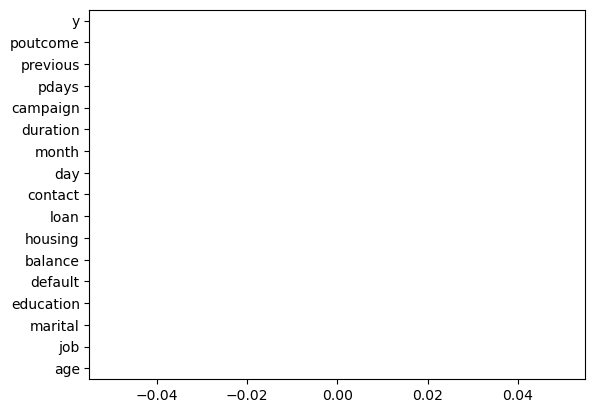

In [11]:
# Checking missing information if any using Graphical Method

df.isnull().sum().plot(kind = 'barh')
plt.show()

In [12]:
# Checking Output i.e. Target Column for Data Distribution
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [13]:
# Encoding Target Column
# No : 0 and Yes : 1

df['y'] = df['y'].replace({'no':0,'yes':1})

In [14]:
# Encoding default Column
# No : 0 and Yes : 1
df['default'] = df['default'].replace({'no':0,'yes':1})

In [15]:
# Encoding housing Column
# No : 0 and Yes : 1
df['housing'] = df['housing'].replace({'no':0,'yes':1})

In [16]:
# Encoding loan Column
# No : 0 and Yes : 1
df['loan'] = df['loan'].replace({'no':0,'yes':1})

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [18]:
# Using Lable Encoding Technique
from sklearn.preprocessing import LabelEncoder

df['job'] = LabelEncoder().fit_transform(df['job'])
df['marital'] = LabelEncoder().fit_transform(df['marital'])
df['education'] = LabelEncoder().fit_transform(df['education'])
df['contact'] = LabelEncoder().fit_transform(df['contact'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['poutcome'] = LabelEncoder().fit_transform(df['poutcome'])

In [19]:
logging.info('Dataset Encoded Successfully.')

In [20]:
# Alternative Code 
'''
le = LabelEncoder()
for i in Categorical_Data:
    df[i] = le.fit_transform(df[i])
'''

'\nle = LabelEncoder()\nfor i in Categorical_Data:\n    df[i] = le.fit_transform(df[i])\n'

In [21]:
# Target Column Shows Imbalance Dataset
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [22]:
# Balancing The Target Column Using Smote Technique

# Step 1 : Divide Dataset into X and y
# X : Independent Column and y : Target Column 

X = df.drop(columns = 'y')  # Independent Columns: 16

y = df['y']                 # Target Column : 1


# Step 2: Split the Dataset into Train and Test
# 100 % ----> 70 % Data is used for Training [Seen Data] and 30 % Data [UnSeen] is used for Testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state = 7)

# Step 3: Normalization/ Scaling Technique 
# Standard Scaler ---> When Dataset is Normally Distributed
# MinMax Scaler ---->  When Dataset having Minor Outliers 
# Robust Scaler ---->  When Dataset is Non Normal Distributed and Having lots of Outliers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4 : Using Smote Technique to Balance Target Column 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
# Step 5 : After Balancing the Target Column for Binary Classification Model use Logistic Regression
'''
Note : 
1. TP --> True Positive
2. TN --> True Negative
3. FP --> False Positive
4. FN --> False Negative

Accuracy   =  (TP + TN) / (TP + TN + FP + FN)

Precision  =  (TP) / (TP + FP)   ----> PPV

Recall  =     (TP ) / (TP + FP)    ---> Sensitivity / TPR

F1 Score  = 2 * ((Precision * Recall) / (Precision + Recall))
'''
# Import Model Preprocessing Library from Sklearn
from sklearn.linear_model import LogisticRegression
# Implement Logistic Regression to our Binary Classification Model
LR = LogisticRegression()
# Fit the Model on Training Dataset 
LR.fit(X_train,y_train)

# Predict the Value Based on Test Dataset
y_pred = LR.predict(X_test)

# Step 6 : Use Metrics to Evaluate Model Performance 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score_LR =  accuracy_score(y_test,y_pred)
accuracy_score_LR



0.8123709820112062

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89     12030
           1       0.35      0.80      0.49      1534

    accuracy                           0.81     13564
   macro avg       0.66      0.81      0.69     13564
weighted avg       0.90      0.81      0.84     13564



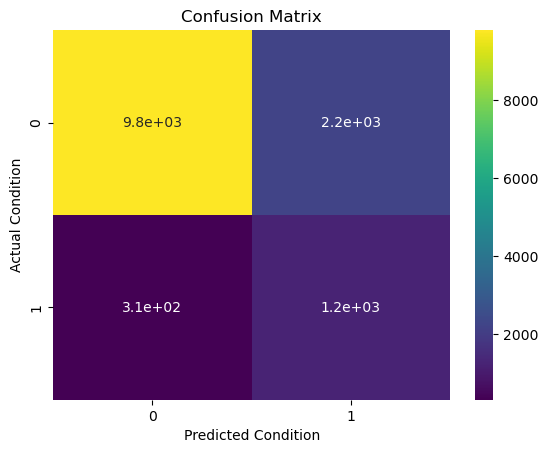

In [31]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Condition')
plt.ylabel('Actual Condition')
plt.show()

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_predict_RF = RF.predict(X_test)

accuracy_score_RF = accuracy_score(y_test,y_predict_RF)

accuracy_score_RF

0.8935417281038042

In [34]:
# Classification Report for Random Forest Model

print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     12030
           1       0.52      0.63      0.57      1534

    accuracy                           0.89     13564
   macro avg       0.74      0.78      0.76     13564
weighted avg       0.90      0.89      0.90     13564



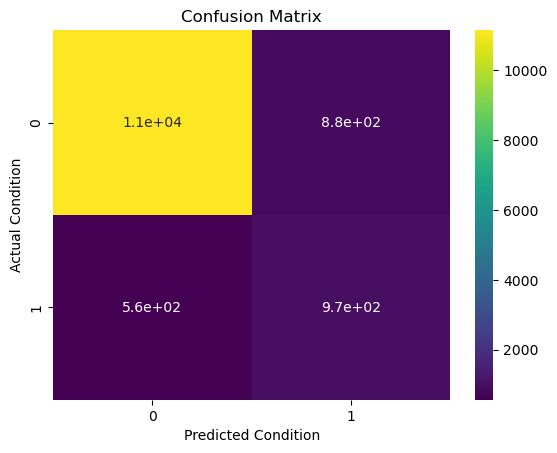

In [38]:
# Confusion Matrix for Random Forest Classification Model

sns.heatmap(confusion_matrix(y_test,y_predict_RF),cmap='viridis',annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Condition')
plt.ylabel('Actual Condition')
plt.show()